<h1>Using the default decision tree settings</h1>

In [3]:
# Gets the preprocessed data set for Organics.
import casestudy_tools as tools
df = tools.preprocess()
#df.info()

In [5]:
# Building a decision tree using the default settings.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Sets target column to ORGYN
target_dataset = df['ORGYN']
# Removes ORGYN from the dataset in order to avoid false predictor.
dataset = df.drop(['ORGYN'], axis=1)

# Sets random state to 10. This will be kept consistently throughout the case study.
random_state = 10
# Sets the test size to be 30% of the total data set.
test_size = 0.3

# Transform the dataset into a matrix.
dataset_matrix = dataset.as_matrix()

# Splits the data into train and test sets.
dataset_train, dataset_test, target_dataset_train, target_dataset_test = train_test_split(dataset_matrix,
                                                                                          target_dataset,
                                                                                          test_size=test_size,
                                                                                          stratify=target_dataset,
                                                                                          random_state=random_state
                                                                                         )

# Training a decision tree model based on deafault settings.
decisiontree_model_def = DecisionTreeClassifier(random_state=random_state)
decisiontree_model_def.fit(dataset_train, target_dataset_train)

# Prints train and test accuracy.
print("Default Decision Tree Statistics:")
print("Train Accuracy:", decisiontree_model_def.score(dataset_train, target_dataset_train))
print("Test Accuracy:", decisiontree_model_def.score(dataset_test, target_dataset_test))

# Printing a classification report of the model.
print("")
print("Classification Report:")
target_predict = decisiontree_model_def.predict(dataset_test)
print(classification_report(target_dataset_test, target_predict))
print("Number of nodes in the decision tree:", decisiontree_model_def.tree_.node_count)


Default Decision Tree Statistics:
Train Accuracy: 0.998585754692723
Test Accuracy: 0.7381130943452827

Classification Report:
             precision    recall  f1-score   support

          0       0.83      0.82      0.83      5015
          1       0.47      0.48      0.48      1652

avg / total       0.74      0.74      0.74      6667

Number of nodes in the decision tree: 6841


In [6]:
# Evaluating the feature importance of the default_decision tree
import numpy as np

# Gets feature importance and relates to the column names of the model
feature_importances = decisiontree_model_def.feature_importances_
feature_names = dataset.columns

# Sorts the features
feature_indices = np.flip(np.argsort(feature_importances), axis=0)

# Prints the features
for i in feature_indices:
    print(feature_names[i], ':', feature_importances[i])

AGE : 0.2998210956388579
AFFL : 0.14745360754933678
BILL : 0.10846261215134576
LTIME : 0.1051955950169931
GENDER_F : 0.04435764128396906
NGROUP_C : 0.020652082351299346
NGROUP_F : 0.020411633405873066
NGROUP_B : 0.018978413418318976
NGROUP_D : 0.01848490123906868
TV_REG_Midlands : 0.01803783161674561
NGROUP_E : 0.017996652764470735
TV_REG_London : 0.016778604651857223
REGION_Midlands : 0.01297957778682568
TV_REG_N West : 0.012567941951689018
TV_REG_S & S East : 0.01242535986993021
CLASS_Silver : 0.012027807687327237
NGROUP_A : 0.011691227817154596
TV_REG_East : 0.010191688076453818
REGION_South East : 0.010181270742274302
TV_REG_Yorkshire : 0.009938115826605554
REGION_North : 0.009078298539291181
TV_REG_Wales & West : 0.009063046816459567
TV_REG_C Scotland : 0.007381700152823672
CLASS_Tin : 0.006914691572999246
CLASS_Gold : 0.006853827232143927
TV_REG_N East : 0.006252132706594195
REGION_Scottish : 0.005118019631301024
TV_REG_N Scot : 0.004112832788036579
GENDER_U : 0.00410620851731903

In [4]:
# Creates a png-file of the default decision tree in order to visualise it.
tools.visualize_decision_tree(decisiontree_model_def, feature_names, "Default Decision Tree - Task 2.png")

In [7]:

# Training a decision tree model based on deafault settings.
decisiontree_model_optimal = DecisionTreeClassifier(max_depth=5, random_state=random_state)
decisiontree_model_optimal.fit(dataset_train, target_dataset_train)

train_accuracy = decisiontree_model_optimal.score(dataset_train, target_dataset_train)
test_accuracy = decisiontree_model_optimal.score(dataset_test, target_dataset_test)
# Prints train and test accuracy.
print("Decision Tree Statistics:")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Accuracy Difference:", train_accuracy - test_accuracy)

# Printing a classification report of the model.
print("")
print("Classification Report:")
target_predict = decisiontree_model_optimal.predict(dataset_test)
print(classification_report(target_dataset_test, target_predict))
print("Number of nodes in the decision tree:", decisiontree_model_optimal.tree_.node_count)


Decision Tree Statistics:
Train Accuracy: 0.8187194651581383
Test Accuracy: 0.8162591870406479
Accuracy Difference: 0.0024602781174903887

Classification Report:
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      5015
          1       0.72      0.42      0.53      1652

avg / total       0.80      0.82      0.80      6667

Number of nodes in the decision tree: 63


In [8]:
# Evaluating the feature importance of the default_decision tree
import numpy as np

# Gets feature importance and relates to the column names of the model
feature_importances = decisiontree_model_optimal.feature_importances_
feature_names = dataset.columns

# Sorts the features
feature_indices = np.flip(np.argsort(feature_importances), axis=0)

# Prints the features
for i in feature_indices:
    print(feature_names[i], ':', feature_importances[i])

AGE : 0.5223047727869613
AFFL : 0.3137192735858661
GENDER_F : 0.14719991911100075
GENDER_U : 0.011264617376759541
GENDER_M : 0.004547477591745247
NGROUP_D : 0.0005890903376042116
NGROUP_C : 0.00037484921006284084
TV_REG_N West : 0.0
TV_REG_N Scot : 0.0
TV_REG_N East : 0.0
TV_REG_Midlands : 0.0
TV_REG_C Scotland : 0.0
TV_REG_London : 0.0
TV_REG_East : 0.0
TV_REG_S West : 0.0
TV_REG_Border : 0.0
LTIME : 0.0
BILL : 0.0
TV_REG_S & S East : 0.0
CLASS_Tin : 0.0
CLASS_Silver : 0.0
TV_REG_Wales & West : 0.0
TV_REG_Yorkshire : 0.0
NGROUP_A : 0.0
NGROUP_B : 0.0
NGROUP_E : 0.0
NGROUP_F : 0.0
NGROUP_U : 0.0
REGION_Midlands : 0.0
REGION_North : 0.0
REGION_Scottish : 0.0
REGION_South East : 0.0
REGION_South West : 0.0
CLASS_Gold : 0.0
CLASS_Platinum : 0.0
TV_REG_Ulster : 0.0


In [7]:
# Creates a png-file of the optimal decision tree in order to visualise it.
tools.visualize_decision_tree(decisiontree_model_optimal, feature_names, "Optimal Decision Tree - Task 2.png")

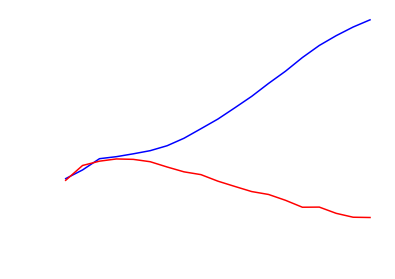

This shows that the optimal node depth of the decision tree is 5.
Anything over a max depth of 5 is considered to overfit the model to the train data.


In [9]:
# Visualising relationship between hyperparameters and model performance
import matplotlib.pyplot as plt
%matplotlib inline

# Sets the color to white.
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    model.fit(dataset_train, target_dataset_train)
    
    test_score.append(model.score(dataset_test, target_dataset_test))
    train_score.append(model.score(dataset_train, target_dataset_train))

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

print("This shows that the optimal node depth of the decision tree is 5.")
print("Anything over a max depth of 5 is considered to overfit the model to the train data.")

<h1>Using CVSearch</h1>

In [11]:
from sklearn.model_selection import GridSearchCV

# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 5),
          'min_samples_leaf': range(10, 50, 10)}

cross_validation_model = GridSearchCV(param_grid=params,
                                      estimator=DecisionTreeClassifier(random_state=random_state),
                                      cv=10)
cross_validation_model.fit(dataset_train, target_dataset_train)

print("Train accuracy:", cross_validation_model.score(dataset_train, target_dataset_train))
print("Test accuracy:", cross_validation_model.score(dataset_test, target_dataset_test))

# test the best model
target_prediction = cross_validation_model.predict(dataset_test)
print(classification_report(target_dataset_test, target_prediction))

# print parameters of the best model
print(cross_validation_model.best_params_)

Train accuracy: 0.8180123425044998
Test accuracy: 0.8158092095395231
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      5015
          1       0.72      0.42      0.53      1652

avg / total       0.80      0.82      0.80      6667

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}


In [15]:
from sklearn.model_selection import GridSearchCV

# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 5),
          'min_samples_leaf': range(1, 2)}

cross_validation_optimal_model = GridSearchCV(param_grid=params,
                                      estimator=DecisionTreeClassifier(random_state=random_state),
                                      cv=10)
cross_validation_optimal_model.fit(dataset_train, target_dataset_train)

train_accuracy_optimal_cv = cross_validation_optimal_model.score(dataset_train, target_dataset_train)
test_accuracy_optimal_cv = cross_validation_optimal_model.score(dataset_test, target_dataset_test)
# Prints train and test accuracy.
print("Decision Tree Statistics:")
print("Train Accuracy:", train_accuracy_optimal_cv)
print("Test Accuracy:", test_accuracy_optimal_cv)
print("Accuracy Difference:", train_accuracy_optimal_cv - test_accuracy_optimal_cv)


# test the best model
target_prediction = cross_validation_optimal_model.predict(dataset_test)
print(classification_report(target_dataset_test, target_prediction))

# print parameters of the best model
print(cross_validation_optimal_model.best_params_)

print("Number of nodes in the decision tree:", cross_validation_optimal_model.best_estimator_.tree_.node_count)

Decision Tree Statistics:
Train Accuracy: 0.8180123425044998
Test Accuracy: 0.8158092095395231
Accuracy Difference: 0.0022031329649767617
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      5015
          1       0.72      0.42      0.53      1652

avg / total       0.80      0.82      0.80      6667

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1}
Number of nodes in the decision tree: 31


In [9]:
# Gets feature importance and relates to the column names of the model
feature_importances_cv = cross_validation_optimal_model.best_estimator_.feature_importances_
feature_names_cv = dataset.columns

# Sorts the features
feature_indices_cv = np.flip(np.argsort(feature_importances_cv), axis=0)

# Prints the features
for i in feature_indices_cv:
    print(feature_names_cv[i], ':', feature_importances_cv[i])

AGE : 0.49485945014637384
AFFL : 0.32121441453906774
GENDER_F : 0.17358620214856707
GENDER_U : 0.010339933165991314
TV_REG_London : 0.0
TV_REG_S & S East : 0.0
TV_REG_N West : 0.0
TV_REG_N Scot : 0.0
TV_REG_N East : 0.0
TV_REG_Midlands : 0.0
TV_REG_C Scotland : 0.0
TV_REG_East : 0.0
CLASS_Silver : 0.0
TV_REG_Border : 0.0
GENDER_M : 0.0
LTIME : 0.0
BILL : 0.0
TV_REG_S West : 0.0
CLASS_Tin : 0.0
TV_REG_Wales & West : 0.0
REGION_Midlands : 0.0
CLASS_Platinum : 0.0
CLASS_Gold : 0.0
REGION_South West : 0.0
REGION_South East : 0.0
REGION_Scottish : 0.0
REGION_North : 0.0
NGROUP_U : 0.0
TV_REG_Yorkshire : 0.0
NGROUP_F : 0.0
NGROUP_E : 0.0
NGROUP_D : 0.0
NGROUP_C : 0.0
NGROUP_B : 0.0
NGROUP_A : 0.0
TV_REG_Ulster : 0.0


In [12]:
# Creates a png-file of the optimal decision tree in order to visualise it.
tools.visualize_decision_tree(cross_validation_optimal_model.best_estimator_, feature_names, "Optimal Decision Tree by Cross-validation - Task 2.png")